In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!chmod 600 /root/.kaggle/kaggle.json

Data Extraction Through Kaggle

In [3]:
!kaggle datasets download -d imsparsh/flowers-dataset

 99% 204M/205M [00:07<00:00, 32.2MB/s]
100% 205M/205M [00:07<00:00, 28.8MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/flowers-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import keras
import keras.utils
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import os

In [6]:
base_dir = '/content/train'

img_size = 224
batch = 64

Image Data Generator

In [7]:
# Create a data augmentor
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
                                   zoom_range=0.2, horizontal_flip=True,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1. / 255,
                                  validation_split=0.2)

In [8]:
# Create datasets
train_datagen = train_datagen.flow_from_directory(base_dir,
                                                  target_size=(
                                                      img_size, img_size),
                                                  subset='training',
                                                  batch_size=batch)
test_datagen = test_datagen.flow_from_directory(base_dir,
                                                target_size=(
                                                    img_size, img_size),
                                                subset='validation',
                                                batch_size=batch)

Found 2198 images belonging to 5 classes.
Found 548 images belonging to 5 classes.


Model Development

In [9]:
# # modelling using a CNN.

model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same',
                 activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(5, activation="softmax"))

Summary of the model

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      4864      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

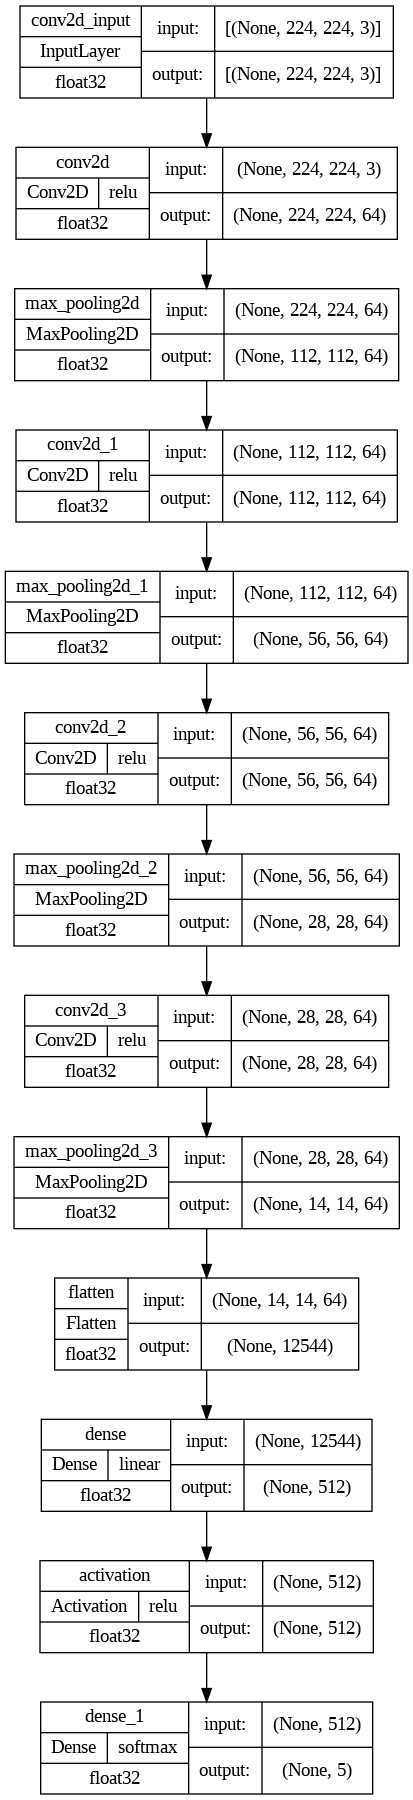

In [12]:
keras.utils.plot_model(
    model,
    show_shapes = True,
    show_dtype = True,
    show_layer_activations = True
)

Compiling the model

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy', metrics=['accuracy'])

Fitting the model

In [14]:
epochs=30
model.fit(train_datagen,epochs=epochs,validation_data=test_datagen)

Epoch 1/30
35/35 [==============================] - 437s 12s/step - loss: 1.4328 - accuracy: 0.3681 - val_loss: 1.2941 - val_accuracy: 0.4799
Epoch 2/30
35/35 [==============================] - 455s 13s/step - loss: 1.1395 - accuracy: 0.5455 - val_loss: 1.1242 - val_accuracy: 0.5493
Epoch 3/30
35/35 [==============================] - 459s 13s/step - loss: 1.0254 - accuracy: 0.5946 - val_loss: 1.0140 - val_accuracy: 0.5967
Epoch 4/30
35/35 [==============================] - 462s 13s/step - loss: 0.9304 - accuracy: 0.6524 - val_loss: 0.9490 - val_accuracy: 0.6332
Epoch 5/30
35/35 [==============================] - 445s 13s/step - loss: 0.8350 - accuracy: 0.6811 - val_loss: 1.0009 - val_accuracy: 0.6277
Epoch 6/30
35/35 [==============================] - 469s 13s/step - loss: 0.8598 - accuracy: 0.6720 - val_loss: 0.9588 - val_accuracy: 0.6369
Epoch 7/30
35/35 [==============================] - 462s 13s/step - loss: 0.7842 - accuracy: 0.6997 - val_loss: 0.9608 - val_accuracy: 0.6168
Epoch 

Saving and Loading model

In [15]:
from tensorflow.keras.models import load_model
model.save('Model.h5')

# load model
savedModel=load_model('Model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model Evaluation and Prediction

In [16]:
train_datagen.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Testing the model

1/1 [==============================] - 0s 63ms/step
[[0. 1. 0. 0. 0.]]
Danelion


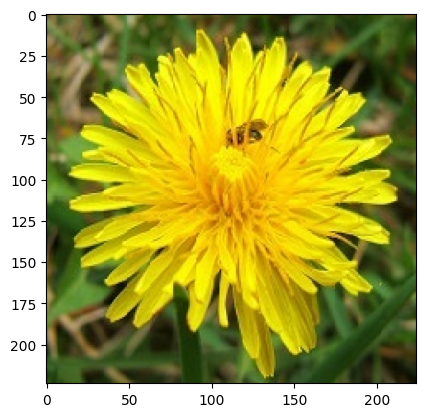

In [22]:
from keras.preprocessing import image

#Creating list for mapping
list_ = ['Daisy','Dandelion','Rose','sunflower', 'tulip']

#Input image
test_image = image.load_img('/content/test/Image_452.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break

1/1 [==============================] - 0s 63ms/step
[[0. 0. 0. 0. 1.]]
tulip


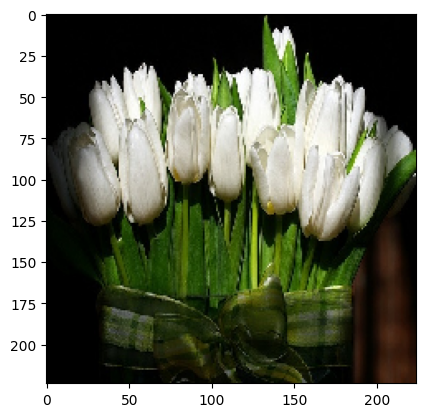

In [24]:
#Input image
test_image = image.load_img('/content/test/Image_723.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = savedModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
  if(result[0][i]==1):
    print(list_[i])
    break

Conclusion : Thus the model is able to recognise specific flower images efficiently